In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA/Cleaning

It is important to demonstrate the nature of data, so that it is possible to then clean it. Then, do an exploratory analysis again, so that it is possible to see it again.

In [3]:
df_prerequisites = pd.read_csv("data/uiuc-prerequisites.csv")

df_learning_analytics = pd.read_csv("data/assessments.csv")

# imports the database from the Internet. Apparently, this is the best(if not only) possible method 
# in HuggingFace
df_coursera = pd.read_csv("hf://datasets/azrai99/coursera-course-dataset/coursera_course_2024.csv", index_col="Unnamed: 0")

## Initial EDA

### Prerequisites Dataset

This dataset has one row per course, with each course having up to 10 prerequisites possible. However, there is only one course with 9 prerequisites and no courses with 10 prerequisites. The rows "0"-"9" contain names of each of the prerequisites per course.

For example, if row has a non-empty value in "0", this means that the course of that row has at least one prerequisite. But if "PrerequisiteNumber"==0, this means that the course in question has no prerequisites.

This confusing nomenclature maybe should be fixed

In [4]:
df_prerequisites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course              8589 non-null   object 
 1   PrerequisiteNumber  8589 non-null   int64  
 2   0                   3426 non-null   object 
 3   1                   1574 non-null   object 
 4   2                   673 non-null    object 
 5   3                   287 non-null    object 
 6   4                   111 non-null    object 
 7   5                   54 non-null     object 
 8   6                   36 non-null     object 
 9   7                   16 non-null     object 
 10  8                   1 non-null      object 
 11  9                   0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 805.3+ KB


In [5]:
df_prerequisites["Course"].value_counts(dropna=False)

Course
ZULU 406    1
AAS 100     1
AAS 105     1
AAS 120     1
AAS 199     1
           ..
AAS 283     1
AAS 286     1
AAS 287     1
AAS 288     1
AAS 290     1
Name: count, Length: 8589, dtype: int64

In [6]:
df_prerequisite_number_count = df_prerequisites["PrerequisiteNumber"].value_counts(dropna=False)

This bar plot shows the distribution of course prerequisite numbers. Over 5000 courses have no prerequisites, and only slightly fewer than 2000 courses have 1 prerequisite. 

This quantity seems to follow the power law of distribution.

Text(0.5, 0, '# of prerequisites for course')

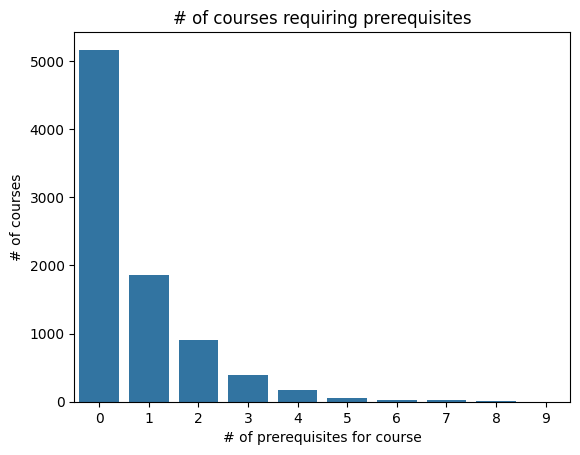

In [7]:
sns.barplot(data=df_prerequisite_number_count)
plt.title("# of courses requiring prerequisites")
plt.ylabel("# of courses")
plt.xlabel("# of prerequisites for course")

In [8]:
df_prerequisites["0"].value_counts(dropna=False)

0
NaN         5163
PSYC 100      46
ECON 302      35
MATH 241      33
MATH 220      32
            ... 
ACCY 303       1
ACCY 312       1
ACCY 502       1
ACCY 505       1
ACCY 405       1
Name: count, Length: 1240, dtype: int64

In [9]:
df_prerequisites.head()

,Course,PrerequisiteNumber,0,1,2,3,4,5,6,7,8,9
0,AAS 100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAS 105,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAS 120,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAS 199,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAS 200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is how it looks like, when a course has 9 prerequisites, the highest possible number in this dataset.

In [10]:
df_prerequisites[df_prerequisites["PrerequisiteNumber"]==9]

,Course,PrerequisiteNumber,0,1,2,3,4,5,6,7,8,9
677,ANSC 498,9,ANSC 293,ANSC 294,ANSC 295,ANSC 299,ANSC 396,ANSC 398,ACES 293,ACES 298,ACES 299,NaN


### Learning Analytics

No idea how to connect this one to the first one. In fact, this is a composition of several databases, and I do not know, which ones are the most useful, if any are at all.

However, the "students"-related datasets could be most useful, as students are a useful component of the web app's workings, and no other database in this code has information on individual students.

In [11]:
df_learning_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [12]:
df_learning_analytics_code_module = df_learning_analytics["code_module"].value_counts(dropna=False).sort_index()

Text(0.5, 0, 'Code module')

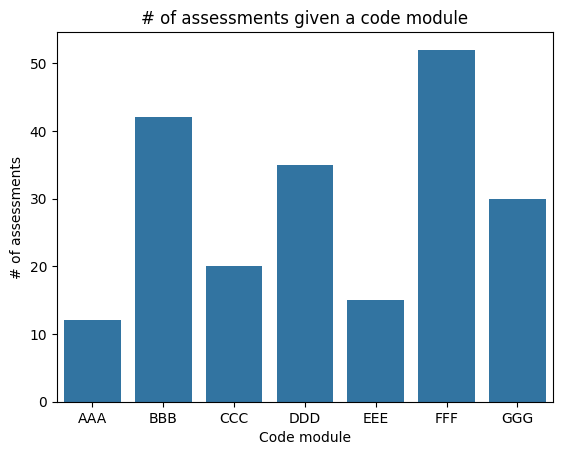

In [13]:
sns.barplot(data=df_learning_analytics_code_module)
plt.title("# of assessments given a code module")
plt.ylabel("# of assessments")
plt.xlabel("Code module")

In [14]:
df_learning_analytics["code_presentation"].value_counts(dropna=False)

code_presentation
2014J    57
2014B    57
2013J    53
2013B    39
Name: count, dtype: int64

In [15]:
df_learning_analytics["id_assessment"].value_counts(dropna=False)

id_assessment
1752     1
1753     1
1754     1
1755     1
1756     1
        ..
37443    1
37435    1
37436    1
37437    1
37444    1
Name: count, Length: 206, dtype: int64

A few assignments don't have dates. This is inconvenient. How to solve it?

In [16]:
df_learning_analytics["date"].value_counts(dropna=False)

date
222.0    15
229.0    14
NaN      11
241.0     9
227.0     8
         ..
129.0     1
94.0      1
171.0     1
199.0     1
136.0     1
Name: count, Length: 75, dtype: int64

### Coursera Dataset


In [17]:
df_coursera.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6645 entries, 0 to 6644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              6645 non-null   object 
 1   enrolled           6645 non-null   object 
 2   rating             6645 non-null   object 
 3   num_reviews        5253 non-null   float64
 4   Instructor         6644 non-null   object 
 5   Organization       6645 non-null   object 
 6   Skills             6645 non-null   object 
 7   Description        6635 non-null   object 
 8   Modules/Courses    6635 non-null   object 
 9   Level              5867 non-null   object 
 10  Schedule           4757 non-null   object 
 11  URL                6645 non-null   object 
 12  Satisfaction Rate  2198 non-null   object 
dtypes: float64(1), object(12)
memory usage: 726.8+ KB


In [18]:
df_coursera["title"].value_counts(dropna=False)

title
Introduction to Generative AI                                  3
Machine Learning Specialization                                2
Business Analytics Specialization                              2
Systems and Application Security                               2
Linux Fundamentals                                             2
                                                              ..
Machine Learning in Healthcare: Fundamentals & Applications    1
Hydrocarbon Exploration and Production                         1
Gemini in Google Meet                                          1
AI for Medicine Specialization                                 1
Healthcare Law Specialization                                  1
Name: count, Length: 6599, dtype: int64

In [19]:
df_coursera["enrolled"].value_counts(dropna=False)

enrolled
Enrollment number not found    1758
2,870                             3
1,974                             3
2,133                             3
3,413                             3
                               ... 
46,844                            1
20,999                            1
20,534                            1
73,081                            1
135,139                           1
Name: count, Length: 4616, dtype: int64

In [21]:
df_coursera["rating"].value_counts(dropna=False)

rating
Rating not found    1436
4.7                 1341
4.8                 1221
4.6                  870
4.5                  473
4.9                  425
4.4                  254
4.3                  170
4.2                  112
4.1                   76
5.0                   64
4.0                   58
3.9                   32
3.8                   29
3.6                   22
3.7                   19
3.5                   13
3.3                   10
3.4                    9
3.2                    5
3.1                    4
3.0                    2
Name: count, dtype: int64

In [20]:
df_coursera_v1 = df_coursera.drop_duplicates()
df_coursera_v1.loc[df_coursera_v1["enrolled"] == "Enrollment number not found", "enrolled"] = pd.NA
df_coursera_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6645 entries, 0 to 6644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              6645 non-null   object 
 1   enrolled           4887 non-null   object 
 2   rating             6645 non-null   object 
 3   num_reviews        5253 non-null   float64
 4   Instructor         6644 non-null   object 
 5   Organization       6645 non-null   object 
 6   Skills             6645 non-null   object 
 7   Description        6635 non-null   object 
 8   Modules/Courses    6635 non-null   object 
 9   Level              5867 non-null   object 
 10  Schedule           4757 non-null   object 
 11  URL                6645 non-null   object 
 12  Satisfaction Rate  2198 non-null   object 
dtypes: float64(1), object(12)
memory usage: 726.8+ KB
